# Part 3: Labs

There are two ways to mazimize an objective function: What we did above, or just simply stochastic gradient descent (SBD), what we do with neural networks. So, in these labs, we use both methods!

First, we'll use SGD, then we'll use Lagrange multipliers.

# 3.1: Stochastic Gradient Descent (SGD)

[Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD) is an **iterative method** for minimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It is an ***alternative*** to Lagrange multipliers.

SGD is a *stochastic* approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the *entire* data set) by an *estimat*e (calculated from a *randomly selected subset* of the data). 

Especially in high-dimensional optimization problems this reduces a high computational burden, achieving faster iterations in trade for a lower convergence rate.

Most often, the true gradient is approximated by a gradient at a single sample.

As the algorithm sweeps through the training set, it performs the above update for each training sample. Several passes can be made over the training set until the algorithm converges. If this is done, the data can be shuffled for each pass to prevent cycles. Typical implementations may use an adaptive learning rate so that the algorithm converges.

For support vectors, we know we want to minimize:

$$min_{w, b} \{\frac{1}{2}|w|^2 + \frac{C}{n}\sum_i \xi_i\}$$

subject to the constraint:

$$y_i(\boldsymbol{w}\boldsymbol{x_i} + b) \ge 1 - \xi_i \;\text{for}\;y_i ∈\{−1,1\}\;\text{and}\; \xi_i > 1 \;\text{and}\; i = 1, \cdots n$$.

In other words, we want to minimize $J(w)$:

$$J(w) = \{\frac{1}{2}|w|^2 + C \sum_i max (1 - y_i(\boldsymbol{w}\boldsymbol{x_i} + b)) \;\text{for}\;y_i ∈\{−1,1\} \}$$

> **Intuition**: As we already know, rhe gradient is the direction of steepest *increase* in the function. To get to the minimum, go in the opposite direction!

So, we start with an initial guess for $w$, say $w_0$. We iterate till convergence (reaching the minimum). That is gradient descent!

- Compute the gradient of the objective function $J$ at $w_t$
- Update $w_t$ to get $w_{t+1}$ by taking a step in the opposite direction of the gradient:

$$w_{t+1} = w_t - r\nabla J(w_t)$$

$r$ is called the learning rate. It controls how much of a *jump* we take.

The gradient of the SVM objective requires summing over the entire training set, which is slow and does not really scale.

The *stochastic* gradient descent picks a random example observation $x_i$ from the training set S:

$$J(w) = \{\frac{1}{2}|w|^2 + C N max (1 - y_i(\boldsymbol{w}\boldsymbol{x_i} + b)) \;\text{for}\;y_i ∈\{−1,1\} \}$$

The algorithm is guaranteed to converge to the minimum of $J$ if the learning rate is small enough.

It is important to shuffle examples at the start of each training epoch.

# 3.2 A small dataset example
Our stochastic gradient descent for the SVM looks like this, with a regularizer parameter $\lambda$:

The objective function for the SVM ($b$ is absorbed into the data):
$$\underset{w}{min}\ \lambda\parallel w\parallel^2 + \ \sum_{i=1}^n\big(1-y_i \langle x_i,w \rangle\big)_+$$

To minimize this function, we need the gradients of this function.

As we have two terms, we will derive them seperately using the sum rule in differentiation:

$$
\frac{\partial}{\partial w_k} \lambda\parallel w\parallel^2 \ = 2 \lambda w_k
$$

$$
\frac{\partial}{\partial w_k} \big(1-y_i \langle x_i,w \rangle\big)_+ \ = \begin{cases}
    0,& \text{if } y_i \langle x_i,w \rangle\geq 1\\
    -y_ix_{ik},              & \text{else}
\end{cases}
$$

This means, if we have a misclassified sample $x_i$, which implies $y_i \langle x_i,w \rangle \ < \ 1$, we update the weight vector $w$ using the gradients of both terms.

If $y_i \langle x_i,w \rangle \geq 1$ we just update $w$ by the gradient of the regularizer.

So the update equation is: 

If $y_i⟨x_i,w⟩ < 1$:
$$
w = w + \eta (y_ix_i - 2\lambda w)
$$
else:
$$
w = w + \eta (-2\lambda w)
$$

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

y = np.array([-1,-1,1,1,1])

For simplicity's sake we fold the bias term $b$ into the data set:

In [3]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

Lets plot the dataset to see if it is linearly seperable (hard-margin SVM):

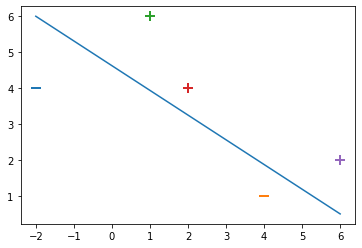

In [4]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2,6],[6,0.5])

We used a regularizer $\lambda$ in the algorithm. As we have a small data set, which is easily lineary seperable, this is actually not needed and the stochastic gradient descent algorithm would probably converge faster without it. 

To keep it simple, we linearly loop over the sample set. For larger data sets it would makes sense to randomly pick a sample during each iteration in the for-loop.

We will run the sgd one million times. Our learning parameter $\eta$ is set to $1$. As a regularizing parameter we choose $1/t$, so this parameter will decrease as the number of epochs increases.

In [5]:
def svm_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000

    for epoch in range(1, epochs):
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
            else:
                w = w + eta * (-2  *(1/epoch)* w)

    return w

We execute to calculate the proper weight vector that fits our training data. 

In [6]:
w = svm_sgd(X, y)
w

array([ 1.58876117,  3.17458055, 11.11863105])

Let's print the number of misclassified and correctly classified samples as a function of the number of epochs:

In [7]:
def svm_sgd_plot(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    errors = []

    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)

    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()

In [8]:
X, y

(array([[-2,  4, -1],
        [ 4,  1, -1],
        [ 1,  6, -1],
        [ 2,  4, -1],
        [ 6,  2, -1]]),
 array([-1, -1,  1,  1,  1]))

<ipython-input-7-469914a1b90a>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_yticklabels([])


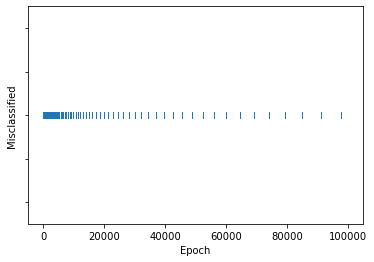

In [9]:
svm_sgd_plot(X,y)

Try again...

In [10]:
def svm_sgd_plot2(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    errors = []

    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error += 1
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)

    plt.plot(errors)
    plt.show()

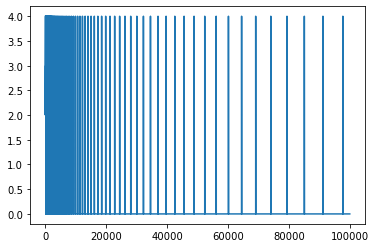

In [11]:
svm_sgd_plot2(X,y)

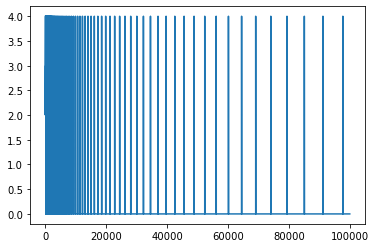

In [12]:
svm_sgd_plot2(X,y)

The graphs show that the svm makes less and less misclassifications the more epochs it runs. When we make errors, we always misclassify 4.

The svm updates its weight vector by the regularizer even if the current samples is correctly classified. So we do not reach zero errors.

This is actually a strengh of the SVM as it always tries to maximize the margin between the two classes: Our SVM in contrast always tries to optimize the hyperplane by maximizing the distance between the two classes.

## Evaluation

Lets classify the samples in our data set by hand now, to check if we learned properly:

First sample $(-2, 4)$, supposed to be negative:

$$-2*1,56+4*3,17 - 11,12 = sign(-1,56) = -1$$

Second sample $(4, 1)$, supposed to be negative:

$$4*1,56+1*3,17 - 11,12 = sign(-1,71) = -1$$

Third sample $(1, 6)$, supposed to be positive:

$$1*1,56+6*3,17-11,12 = sign(9,46) = +1$$

Fourth sample $(2, 4)$, supposed to be positive:

$$2*1,56+4*3,17 - 11,12 = sign(4,68) = +1$$

Fifth sample $(6, 2)$, supposed to be positive:

$$6*1,56+2*3,17 - 11,12 = sign(4,58) = +1$$

***Perfect!!!***

Lets define two test samples now, to check how well our model generalizes to unseen data:

First test sample $(2, 2)$, *supposed to be negative*:

$$2*1,56+2*3,17 - 11,12 = sign(-1,66) = -1$$

Second test sample $(4, 3)$, *supposed to be positive*:

$$4*1,56+3*3,17 - 11,12 = sign(4,63) = +1$$

Both out-of-box samples are classified correctly. To check this geometrically, we plot the samples including test samples and the hyperplane.

1.5887611677029299


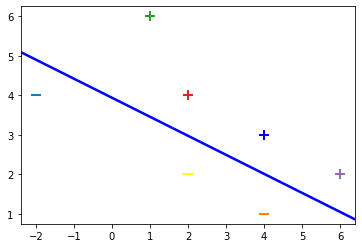

In [13]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
print(w[0])
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

# 3.3: CIFAR with stochastic gradient descent (SGD)
Let's work with a more complex dataset.

This is a simple github implementation of SVMs for pictures classification. It includes code i've downloaded and uploaded on canvas.

A compromise between computing the true gradient and the gradient at a single sample is to compute the gradient against more than one training sample, called a **mini-batch**, at each step. This can perform significantly better than *true* stochastic gradient descent. It may also result in smoother convergence, as the gradient computed at each step is averaged over more training samples.

In [14]:
import pickle
import numpy as np
import os
#from scipy.misc import imread
from matplotlib.pyplot import imread

#def load_CIFAR_batch(filename):
#    """ load single batch of cifar """
#    with open(filename, 'rb') as f:
#        datadict = pickle.load(f)
#        X = datadict['data']
#        Y = datadict['labels']
#        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
#        Y = np.array(Y)
#        return X, Y
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    datadict = unpickle(filename)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y   

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [15]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [16]:
cifar10_dir = 'cifar-10-batches-py'
db1 = unpickle(cifar10_dir + '/data_batch_1')
db1.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [17]:
for k in db1.keys():
    print(len(db1[k]))

21
10000
10000
10000


In [18]:
db1['data'].shape

(10000, 3072)

In [19]:
3 * 32 * 32

3072

In [20]:
X1 = db1['data'][123].reshape(3, 32, 32).transpose(1,2,0).astype("float")

In [21]:
X1b = np.flip(X1, (0,1))

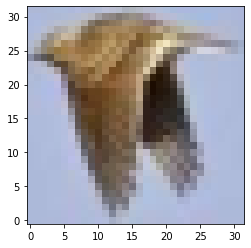

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(X1b.astype('uint8'), origin='lower')

In [23]:
X1b.shape

(32, 32, 3)

In [24]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [25]:
# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


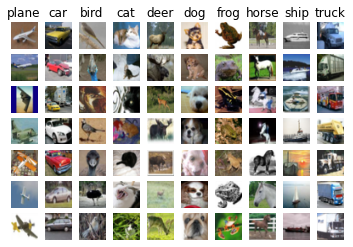

In [26]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

One day... I will investigate why my environment plots mirror images... Sigh.

If your plots are right side up, *don't* run the cell below!

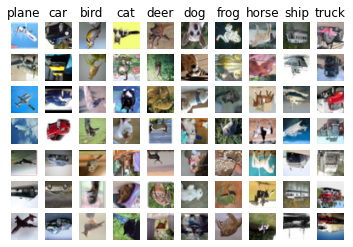

In [27]:
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        flipped = np.flip(X_train[idx], (0,1))
        plt.imshow(flipped.astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

We split the data into train, val, and test sets. 

In addition we create a small development set as a subset of the training data. We can use this for development so our code runs faster.

In [28]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original training set
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original training set
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of the training set
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our test set
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [29]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print ('Training data shape: ', X_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Test data shape: ', X_test.shape)
print ('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


We subtract the mean image. 

This is a rescaling operation. 

By subtracting the image mean, we ensure all pixel values are in a similar range, so that factors such as image saturation (high intensity values) does not become a discriminating factor.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


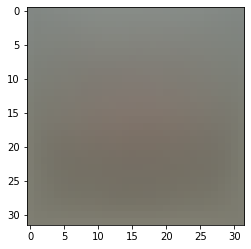

In [30]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print (mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [31]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [32]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print (X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [33]:
32 * 32 * 3

3072

### SVM Classifier
The function `compute_loss_naive()` evaluates the multiclass SVM loss function.

Please download this code from canvas, unzip the .py files, and drop them in folder {!pwd}`/pythoncode`:

In [34]:
import sys
sys.path.append('./pythoncode/')


import linearsvm
import gradientcheck
import linearclassifier

In [35]:
import time

# generate a random SVM weight matrix of small numbers
W = np.random.randn(3073, 10) * 0.0001 

loss, grad = linearsvm.svm_loss_naive(W, X_dev, y_dev, 0.00001)
print ('loss: %f' % (loss, ))

loss: 8.968476


In [36]:
# Recompute the gradient and gradient check it with grad_check_sparse

# Compute the loss and its gradient at W.
loss, grad = linearsvm.svm_loss_naive(W, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
f = lambda w: linearsvm.svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = gradientcheck.grad_check_sparse(f, W, grad)

# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = linearsvm.svm_loss_naive(W, X_dev, y_dev, 1e2)
f = lambda w: linearsvm.svm_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = gradientcheck.grad_check_sparse(f, W, grad)

numerical: 21.867143 analytic: 21.867143, relative error: 1.599726e-11
numerical: 5.799113 analytic: 5.799113, relative error: 5.809882e-11
numerical: 19.163440 analytic: 19.163440, relative error: 3.325993e-12
numerical: 11.876549 analytic: 11.876549, relative error: 6.854198e-12
numerical: 23.565802 analytic: 23.565802, relative error: 9.839317e-12
numerical: 10.338598 analytic: 10.338598, relative error: 1.322689e-11
numerical: 19.872190 analytic: 19.872190, relative error: 3.141132e-13
numerical: 14.503470 analytic: 14.503470, relative error: 9.655680e-12
numerical: -7.420229 analytic: -7.420229, relative error: 5.301741e-11
numerical: -6.567470 analytic: -6.567470, relative error: 1.972861e-11
numerical: -23.958314 analytic: -23.958314, relative error: 1.013136e-11
numerical: 9.793669 analytic: 9.793669, relative error: 5.328979e-12
numerical: 1.861689 analytic: 1.861689, relative error: 4.837660e-11
numerical: 6.246030 analytic: 6.246030, relative error: 1.332027e-11
numerical: 1

In [37]:
tic = time.time()
loss_naive, grad_naive = linearsvm.svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, _ = linearsvm.svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print ('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 8.968476e+00 computed in 0.234659s
Vectorized loss: 8.968476e+00 computed in 0.004506s
difference: 0.000000


In [38]:
# The naive implementation and the vectorized implementation should match.
# The vectorized version should still be much faster.
tic = time.time()
_, grad_naive = linearsvm.svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = linearsvm.svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Vectorized loss and gradient: computed in %fs' % (toc - tic))

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them.
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print ('difference: %f' % difference)

Naive loss and gradient: computed in 0.186539s
Vectorized loss and gradient: computed in 0.004009s
difference: 0.000000


Train the linear classifier

In [39]:
svm = linearclassifier.LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print ('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 796.139547
iteration 100 / 1500: loss 291.249406
iteration 200 / 1500: loss 109.457030
iteration 300 / 1500: loss 43.236101
iteration 400 / 1500: loss 19.262556
iteration 500 / 1500: loss 10.405279
iteration 600 / 1500: loss 7.132523
iteration 700 / 1500: loss 5.887218
iteration 800 / 1500: loss 5.334777
iteration 900 / 1500: loss 5.582861
iteration 1000 / 1500: loss 5.315852
iteration 1100 / 1500: loss 5.610618
iteration 1200 / 1500: loss 4.992959
iteration 1300 / 1500: loss 5.483328
iteration 1400 / 1500: loss 5.716648
That took 6.166193s


Plot the loss as a function of iteration number:

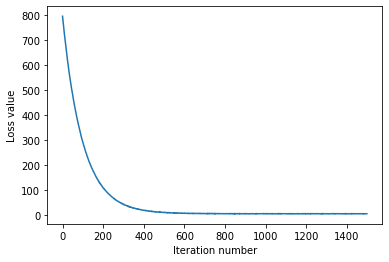

In [40]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

Looks good!

Evaluate performance on both the training and validation set:

In [41]:
y_train_pred = svm.predict(X_train)
print ('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print ('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.365510
validation accuracy: 0.378000


Using a validation set to tune hyperparameters (regularization strength and learning rate),
we experiment with different ranges for the learning rates and regularization strengths.

We should be able to get a classification accuracy of about 0.4 on the validation set.

>**Question**: Is this good or bad?

In [42]:
learning_rates = [2e-7, 1e-7, 5e-8]
regularization_strengths = [2e4, 5e4, 1e5]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

def compute_accuracy(y, y_pred):
    return np.mean(y == y_pred)

for lr in learning_rates:
    for reg in regularization_strengths:
        # train svm 
        print ("**********************************")
        print ("lr: %.8f, reg: %5.1f" %(lr, reg))
        svm = linearclassifier.LinearSVM()
        svm.train(X_train, y_train, learning_rate=lr, reg=reg, num_iters=1500, verbose=False)

        # compute accuracy
        train_accuracy = compute_accuracy(y_train, svm.predict(X_train))
        val_accuracy = compute_accuracy(y_val, svm.predict(X_val))
        print ('train accuracy: %.4f' %train_accuracy)
        print ('validation accuracy: %.4f' %val_accuracy)

        # store accuracy in dictionary
        results[(lr, reg)] = (train_accuracy, val_accuracy)

        # check if validation accuracy is best
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm

# print results
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

**********************************
lr: 0.00000020, reg: 20000.0
train accuracy: 0.3757
validation accuracy: 0.3670
**********************************
lr: 0.00000020, reg: 50000.0
train accuracy: 0.3641
validation accuracy: 0.3770
**********************************
lr: 0.00000020, reg: 100000.0
train accuracy: 0.3488
validation accuracy: 0.3660
**********************************
lr: 0.00000010, reg: 20000.0
train accuracy: 0.3826
validation accuracy: 0.3810
**********************************
lr: 0.00000010, reg: 50000.0
train accuracy: 0.3668
validation accuracy: 0.3820
**********************************
lr: 0.00000010, reg: 100000.0
train accuracy: 0.3555
validation accuracy: 0.3660
**********************************
lr: 0.00000005, reg: 20000.0
train accuracy: 0.3577
validation accuracy: 0.3600
**********************************
lr: 0.00000005, reg: 50000.0
train accuracy: 0.3730
validation accuracy: 0.3810
**********************************
lr: 0.00000005, reg: 100000.0
train accurac

Visualize results:

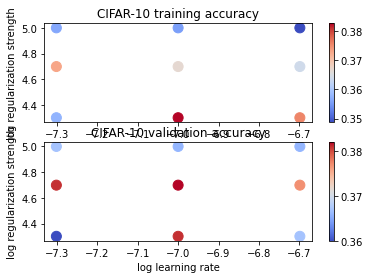

In [43]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap='coolwarm')
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap='coolwarm')
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

Evaluate the best svm on test set:

In [44]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.377000


Visualize the learned weights for each class.

Depending on choice of learning rate and regularization strength, these may be interesting to visualize.

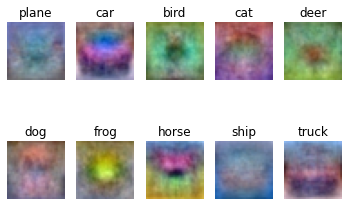

In [45]:
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

What do our visualized SVM weights look like?

Each weight represents the mean image of each class!

# 3.4: Points dataset using Lagrange multipliers

This is the [simplest implementation](https://machinelearningmastery.com/method-of-lagrange-multipliers-the-theory-behind-support-vector-machines-part-3-implementing-an-svm-from-scratch-in-python/) I found with Lagrange multipliers. 

We don't solve the optimization problem with SGD iterations anymore. We use math code from `scipy` instead.

We repeat here the dual formulation of the Lagrange multipliers formula for the Soft Margin SVM (which is as simple as the Hard Margin one, so why not?). We denote our Lagrange multipliers as $\alpha_i$ instead of $\lambda_i$, and $t_i$ instead of $y_i$ target variables.

The SVM classifier maximizes the following Lagrange dual:

$$L_d = -\frac{1}{2} \sum_i \sum_k \alpha_i \alpha_k t_i t_k (x_i)^T (x_k) + \sum_i \alpha_i$$

where $\alpha_i$ are the Lagrange multipliers and $t_i$ are the target labels.

The above function is subject to the following constraints:

\begin{eqnarray}
0 \leq \alpha_i \leq C, & \;\forall i\\
\sum_i \alpha_i t_i = 0& \\
\end{eqnarray}

In [46]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

In [47]:
from scipy.optimize import Bounds, BFGS                     
from scipy.optimize import LinearConstraint, minimize   

import sklearn.datasets as dt

In [48]:
ZERO = 1e-7

## Defining the data points and labels
We define a simple dataset.

Just to recall support vectors are those points for which $\alpha>0$.

In [49]:
#dat = np.array([[0, 3], [-1, 0], [1, 2], [2, 1], [3,3], [0, 0], [-1, -1], [-3, 1], [3, 1]])
#labels = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1])

data = np.array([[np.random.randint(7) - 3, np.random.randint(7) - 3] for x in range(10)])
#labels = np.array([np.random.randint(2) - 1 for x in range(10)])
labels = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])
len(data), len(labels), data, labels

(10,
 10,
 array([[-2,  3],
        [-1,  3],
        [-1, -2],
        [ 2, -1],
        [ 1, -3],
        [ 3, -3],
        [-2, -3],
        [-1,  0],
        [ 0, -3],
        [-3, -1]]),
 array([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1]))

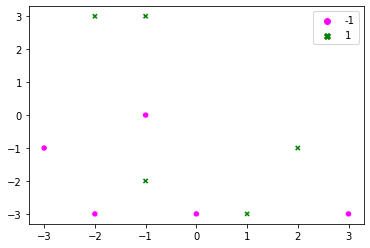

In [50]:
def plot_x(x, t, alpha=[], C=0):
    sns.scatterplot(x=x[:,0], y=x[:,1], hue=t, style=t, palette=['magenta', 'green'])
    
    # If support vectors are provided, annotate them
    if len(alpha) > 0:
        alpha_str = np.char.mod('%.1f', np.round(alpha, 1))
        ind_sv = np.where(alpha > ZERO)[0]
        for i in ind_sv:   
            plt.gca().text(x[i, 0], x[i, 1] - 0.25, alpha_str[i])

# Call the plotting function
plot_x(data, labels)
plt.show()

## Defining the Objective Function
Our objective function is $L_d$ defined above, which has to be maximized. 

Since we are using the `minimize()` function from `scipy.optimize`, we multiply $L_d$ by (-1) and  maximize it.

The first parameter for the objective function is the variable with respect to which the optimization takes place. 

We also need the training points and the corresponding labels as additional arguments.

In [51]:
# Objective function
def lagrange_dual(alpha, x, t):
    result = 0
    ind_sv = np.where(alpha > ZERO)[0]
    for i in ind_sv:
        for k in ind_sv:
            result = result + alpha[i]*alpha[k]*t[i]*t[k]*np.dot(x[i, :], x[k, :]) 
    result = 0.5*result - sum(alpha)     
    return result

## Defining the Linear Constraints
The linear constraint on alpha for each point is given by:

$$
\sum_i \alpha_i t_i = 0
$$

$$
\alpha_0 t_0 + \alpha_1 t_1 + \ldots \alpha_m t_m = 0
$$

The `LinearConstraint()` method from `scipy.optimize` requires all constraints to be written as matrix form, which is:

\begin{equation}
0 =
\begin{bmatrix}
t_0 & t_1 & \ldots t_m
\end{bmatrix}
\begin{bmatrix}
\alpha_0\\ \alpha_1 \\ \vdots \\ \alpha_m
\end{bmatrix}
= 0
\end{equation}

The first matrix is the first parameter in the `LinearConstraint()` method. The left and right bounds are the second and third arguments.

In [52]:
linear_constraint = LinearConstraint(labels, [0], [0])
print(linear_constraint)

## Defining the Bounds
The bounds on alpha are defined using the `Bounds()` method from `scipy.optimize`. 

All alphas are constrained to lie between 0 and $C$. Here is an example for $C=10$.

In [53]:
bounds_alpha = Bounds(np.zeros(data.shape[0]), np.full(data.shape[0], 10))
print(bounds_alpha)

Bounds(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))


## Defining the function to find alphas
Let’s write the overall routine to find the optimal values of alpha with the given parameters $x$, $t$, and $C$. 

The objective function requires the additional arguments $x$ and $t$, which are passed via args in `minimize()`.

In [54]:
def optimize_alpha(x, t, C):
    m, n = x.shape
    np.random.seed(1)
    
    # Initialize alphas to random values
    alpha_0 = np.random.rand(m)*C
    
    # Define the constraint
    linear_constraint = LinearConstraint(t, [0], [0])
    
    # Define the bounds
    bounds_alpha = Bounds(np.zeros(m), np.full(m, C))
    
    # Find the optimal value of alpha
    result = minimize(lagrange_dual, alpha_0, args = (x, t), method='trust-constr', 
                      hess=BFGS(), constraints=[linear_constraint],
                      bounds=bounds_alpha)
    
    # The optimized value of alpha lies in result.x
    alpha = result.x
    return alpha

## Determining the hyperplane
The expression for the hyperplane is given by:
$$
w^T x + b = 0
$$

For the hyperplane, we need the weight vector $\mathbf{w}$ and the constant $b$. The weight vector is given by:
$$
w = \sum_i \alpha_i t_i x_i
$$

If there are too many training points, it’s best to use only support vectors with $\alpha>0$ to compute the weight vector.

For $b$, we’ll compute it from each support vector $s$, for which $\alpha_s < C$, and then take the average. For a single support vector $x_s$, $b$ is given by:

$$
b = t_s – w^T x_s
$$

A support vector’s alpha cannot be numerically exactly equal to $C$. Hence, we can subtract a small constant from $C$ to find all support vectors with $\alpha_s < C$. 

This is done in the `get_b()` function.

In [55]:
def get_w(alpha, t, x):
    m = len(x)
    # Get all support vectors
    w = np.zeros(x.shape[1])
    for i in range(m):
        w = w + alpha[i]*t[i]*x[i, :]        
    return w
 
def get_b(alpha, t, x, w, C):
    C_numeric = C-ZERO
    # Indices of support vectors with alpha<C
    ind_sv = np.where((alpha > ZERO)&(alpha < C_numeric))[0]
    b = 0.0
    for s in ind_sv:
        b = b + t[s] - np.dot(x[s, :], w)
    # Take the average    
    b = b / len(ind_sv)
    return b

## Classifying Test Points
To classify a test point $x_{test}$, we use the sign of $y(x_{test})$ as:

$$
\text{label}_{x_{test}} = \text{sign}(y(x_{test})) = \text{sign}(w^T x_{test} + b)
$$

Let’s write the corresponding function that can take as argument an array of test points along with $w$ and $w_0$ and classify various points. We have also added a second function for calculating the misclassification rate:

In [56]:
def classify_points(x_test, w, b):
    # get y(x_test)
    predicted_labels = np.sum(x_test*w, axis=1) + b
    predicted_labels = np.sign(predicted_labels)
    # Assign a label arbitrarily a +1 if it is zero
    predicted_labels[predicted_labels==0] = 1
    return predicted_labels
 
def misclassification_rate(labels, predictions):
    total = len(labels)
    errors = sum(labels != predictions)
    return errors/total*100

## Plotting the margin and hyperplane
Let’s also define functions to plot the hyperplane and the soft margin.

In [57]:
def plot_hyperplane(w, b):
    x_coord = np.array(plt.gca().get_xlim())
    y_coord = -b/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, y_coord, color='red')
    return
 
def plot_margin(w, b):
    x_coord = np.array(plt.gca().get_xlim())
    ypos_coord = 1/w[1] - b/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, ypos_coord, '--', color='green') 
    yneg_coord = -1/w[1] - b/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, yneg_coord, '--', color='magenta')
    return

# Results
It’s now time to run the SVM. The function `display_SVM_result()` will help us visualize. 

We’ll initialize `alpha` to random values, define $C$ and find the best values of `alpha` in this function. 

We’ll also plot the hyperplane, the margin and the data points. The support vectors would also be labelled by their corresponding alpha value. The title of the plot would be the percentage of errors and number of support vectors.

In [58]:
def display_SVM_result(x, t, C):
    # Get the alphas
    alpha = optimize_alpha(x, t, C)   
    # Get the weights
    w = get_w(alpha, t, x)
    w0 = get_b(alpha, t, x, w, C)
    plot_x(x, t, alpha, C)
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    plot_hyperplane(w, w0)
    plot_margin(w, w0)
    plt.xlim(xlim)
    plt.ylim(ylim)
    # Get the misclassification error and display it as title
    predictions = classify_points(x, w, w0)
    err = misclassification_rate(t, predictions)
    title = 'C = ' + str(C) + ',  Errors: ' + '{:.1f}'.format(err) + '%'
    title = title + ',  total SV = ' + str(len(alpha[alpha > ZERO]))
    plt.title(title)

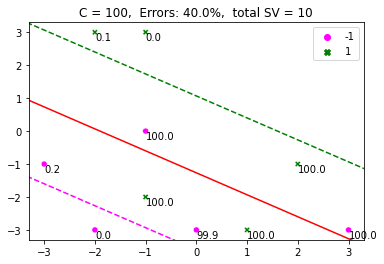

In [59]:
display_SVM_result(data, labels, 100)    
plt.show()

## The Effect of C
If you change the value of C to $\infty$, then the **soft margin** turns into a **hard margin**, with no tolerance for errors. The problem we defined above is not solvable in this case. Let’s generate an artificial set of points and look at the effect of C on classification. To understand the entire problem, we’ll use a simple dataset, where the positive and negative examples are separable.

Below are the points generated via make_blobs():

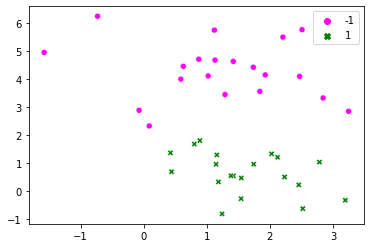

In [60]:
data, labels = dt.make_blobs(n_samples=[20,20],
                           cluster_std=1,
                           random_state=0)
labels[labels==0] = -1
plot_x(data, labels)

Now let’s define different values of C and run the code.

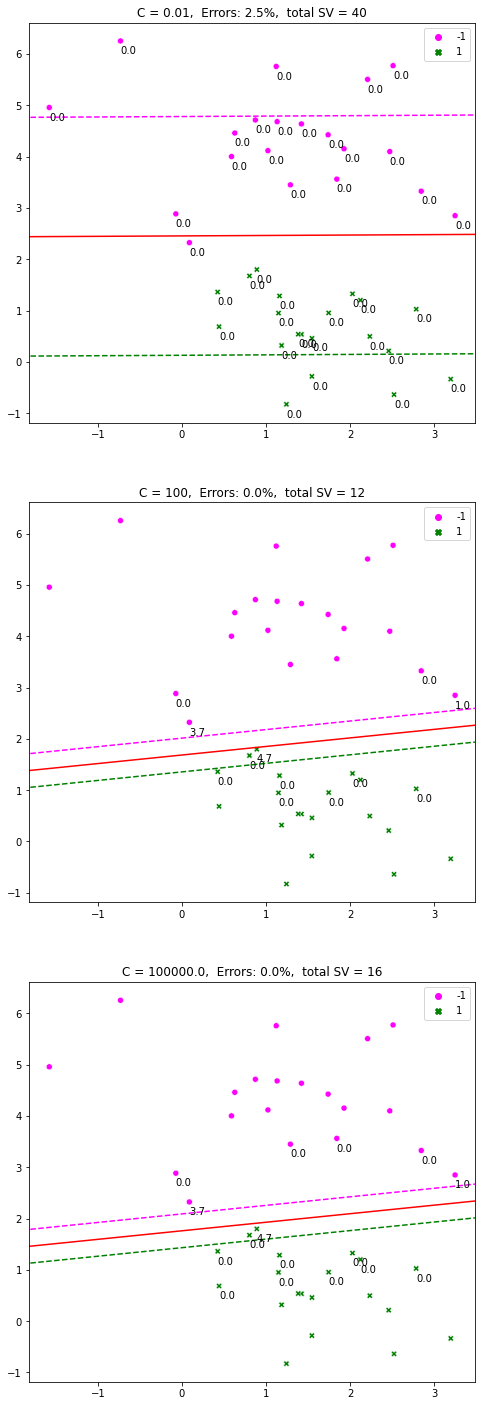

In [61]:
fig = plt.figure(figsize=(8,25))
 
i=0
C_array = [1e-2, 100, 1e5]
 
for C in C_array:
    fig.add_subplot(311+i)    
    display_SVM_result(data, labels, C)  
    i = i + 1

The above is an example which shows that increasing $C$, decreases the margin. 

A high value of $C$ adds a stricter penalty on errors. 

A smaller value allows a wider margin and more misclassification errors. 

Hence, $C$ defines a tradeoff between the maximization of margin and classification errors.

# 3.5: Complete CIFAR with Sklearn's SVM
Using 150 component PCA and a radial basis function (rbf) on sklearn's SVC.

In [62]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [63]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [64]:
import pickle
import numpy as np
import os
#from scipy.misc import imread
from matplotlib.pyplot import imread

#def load_CIFAR_batch(filename):
#    """ load single batch of cifar """
#    with open(filename, 'rb') as f:
#        datadict = pickle.load(f)
#        X = datadict['data']
#        Y = datadict['labels']
#        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
#        Y = np.array(Y)
#        return X, Y
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    datadict = unpickle(filename)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y   

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [65]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [66]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [67]:
# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


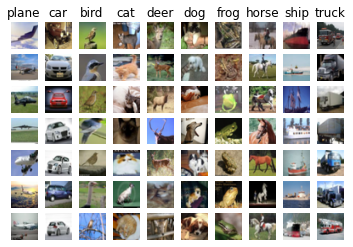

In [68]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Flip x-axis:

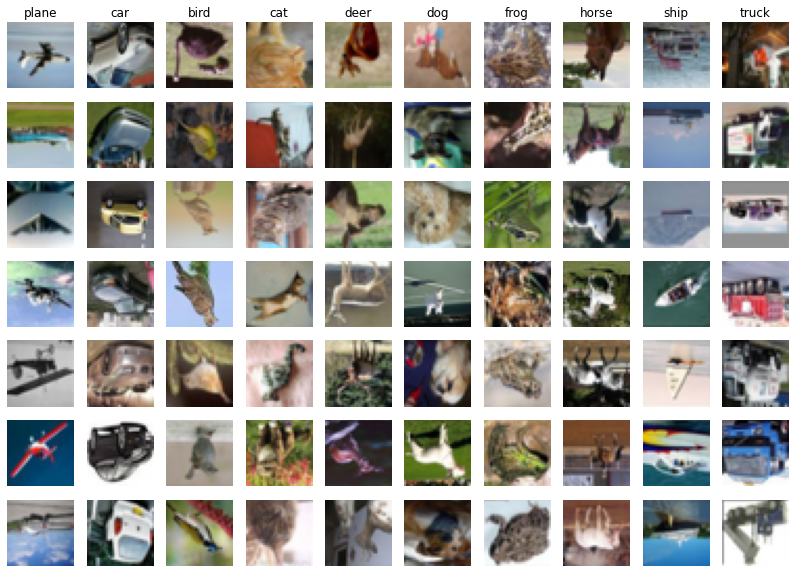

In [69]:
plt.figure(figsize=(14,10))

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        flipped = np.flip(X_train[idx], (0,1))
        plt.imshow(flipped.astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

In [70]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

In [71]:
32 * 32 * 3

3072

>**Note**: *Do not* run the full dataset in class. Instead, move to the reduced dataset section below!

In [72]:
X_train_flat = np.zeros((50000, 1024))
for k in range(10000):
    bw = np.zeros((32, 32))
    bw = (0.299 * X_test[k][:,:,2]) + (0.587 * X_test[k][:,:,1]) + (0.114 * X_test[k][:,:,0])
    X_train_flat[k] = bw.flatten()
    
X_train_flat.shape

(50000, 1024)

On the entire 50,000 dataset, this took a couple of hours on my i7.

In [73]:
from sklearn.model_selection import GridSearchCV
#param_grid = {'svc__C': [0.5, 1, 5],
#              'svc__gamma': [0.0005, 0.001, 0.005]}
param_grid = {'svc__C': [5],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_train_flat, y_train)
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


Let's evaluate:

In [74]:
X_test.shape

(10000, 32, 32, 3)

In [75]:
X_test_flat = np.zeros((10000, 1024))
for k in range(10000):
    bw = np.zeros((32, 32))
    bw = (0.299 * X_test[k][:,:,2]) + (0.587 * X_test[k][:,:,1]) + (0.114 * X_test[k][:,:,0])
    X_test_flat[k] = bw.flatten()
    
X_test_flat.shape

(10000, 1024)

In [76]:
model = grid.best_estimator_
y_fit = model.predict(X_test_flat)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       0.10      0.10      0.10      1000
           1       0.09      0.09      0.09      1000
           2       0.11      0.11      0.11      1000
           3       0.10      0.10      0.10      1000
           4       0.11      0.11      0.11      1000
           5       0.11      0.11      0.11      1000
           6       0.09      0.09      0.09      1000
           7       0.10      0.10      0.10      1000
           8       0.09      0.09      0.09      1000
           9       0.10      0.10      0.10      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



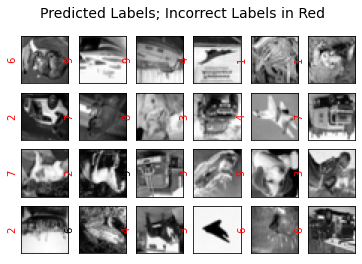

In [78]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    # Reshape the flattened image (1024) into a 32x32 grayscale image
    axi.imshow(X_test_flat[i].reshape(32, 32).astype('uint8'), origin='lower', cmap='gray')
    
    # Remove x and y ticks
    axi.set(xticks=[], yticks=[])
    
    # Set label color: black for correct predictions, red for incorrect
    axi.set_ylabel(y_fit[i],
                   color='black' if y_fit[i] == y_test[i] else 'red')

# Set title for the entire figure
fig.suptitle('Predicted Labels; Incorrect Labels in Red', size=14)
plt.show()

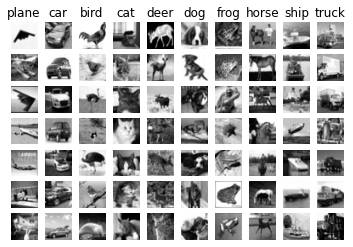

In [79]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

# Iterate over each class
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_test == y)  # Find indices of samples that belong to class `y`
    idxs = np.random.choice(idxs, samples_per_class, replace=False)  # Randomly pick samples from this class
    
    # Plot each sample
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        
        # Reshape to 32x32 grayscale and plot using cmap='gray'
        plt.imshow(X_test_flat[idx].reshape(32, 32).astype('uint8'), cmap='gray')
        plt.axis('off')
        
        # Set title only for the first image in each class
        if i == 0:
            plt.title(cls)

plt.show()

## Reduced dataset

In [80]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
#pca = RandomizedPCA(n_components=20, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [83]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

In [84]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000,))

In [85]:
X_train_reduced = X_train[:10000]
y_train_reduced = y_train[:10000]

In [86]:
X_train_reduced.shape, y_train_reduced.shape

((10000, 32, 32, 3), (10000,))

In [87]:
X_train_flat = np.zeros((10000, 1024))
for k in range(10000):
    bw = np.zeros((32, 32))
    bw = (0.299 * X_train[k][:,:,2]) + (0.587 * X_train[k][:,:,1]) + (0.114 * X_train[k][:,:,0])
    X_train_flat[k] = bw.flatten()
    
X_train_flat.shape

(10000, 1024)

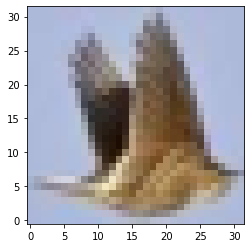

In [88]:
plt.imshow(X_train[123].astype('uint8'), origin='lower')

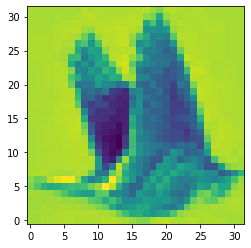

In [89]:
plt.imshow(
    (0.299 * X_train[123][:,:,2]) + (0.587 * X_train[123][:,:,1]) + (0.114 * X_train[123][:,:,0]).astype('uint8'), 
    origin='lower')

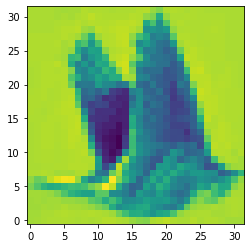

In [90]:
plt.imshow(X_train_flat[123].reshape(32, 32).astype('uint8'), origin='lower')

*Without* removing colors, I would've had:

Instead of ``GridSearchCV:

In [91]:
#param_grid = {'svc__C': [0.5, 1, 5, 10],
#              'svc__gamma': [0.005, 0.01, 0.05, 0.1]}
param_grid = {'svc__C': [5],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train_flat, y_train_reduced)
print(grid.best_params_)

Wall time: 1min 15s
{'svc__C': 5, 'svc__gamma': 0.005}


Do *this*:

In [92]:
X_train_flat.shape, y_train_reduced.shape

((10000, 1024), (10000,))

In [93]:
import time
%time model.fit(X_train_flat, y_train_reduced)

Wall time: 12.6 s


Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [94]:
X_test_reduced = X_test[:10000]
y_test_reduced = y_test[:10000]

In [95]:
X_test_reduced.shape, y_test_reduced.shape

((10000, 32, 32, 3), (10000,))

In [96]:
X_test_flat = np.zeros((10000, 1024))
for k in range(10000):
    bw = np.zeros((32, 32))
    bw = (0.299 * X_test[k][:,:,2]) + (0.587 * X_test[k][:,:,1]) + (0.114 * X_test[k][:,:,0])
    X_test_flat[k] = bw.flatten()
    
X_test_flat.shape

(10000, 1024)

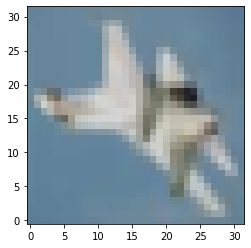

In [97]:
plt.imshow(X_test[10].astype('uint8'), origin='lower')

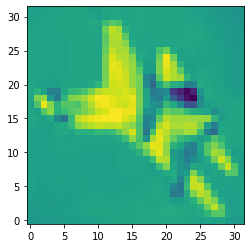

In [98]:
plt.imshow(X_test_flat[10].reshape(32, 32).astype('uint8'), origin='lower')

In [99]:
# Uncomment the line below if you ran GridSeearchCV
#model = grid.best_estimator_
y_fit = model.predict(X_test_flat)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test_reduced, y_fit))

              precision    recall  f1-score   support

           0       0.44      0.37      0.40      1000
           1       0.41      0.48      0.44      1000
           2       0.28      0.27      0.28      1000
           3       0.26      0.16      0.20      1000
           4       0.31      0.37      0.34      1000
           5       0.38      0.32      0.34      1000
           6       0.37      0.38      0.37      1000
           7       0.42      0.41      0.41      1000
           8       0.48      0.51      0.49      1000
           9       0.40      0.52      0.45      1000

    accuracy                           0.38     10000
   macro avg       0.37      0.38      0.37     10000
weighted avg       0.37      0.38      0.37     10000



Let's take a look at a few of the test images along with their predicted values:

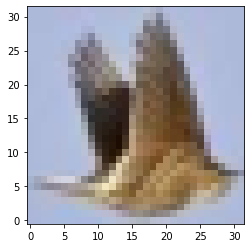

In [101]:
import matplotlib.pyplot as plt

X1 = X_train[123].astype("float")
plt.imshow(X1.astype('uint8'), origin='lower')

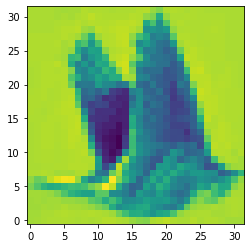

In [102]:
X1 = X_train_flat[123].reshape(32, 32).astype("float")
plt.imshow(X1.astype('uint8'), origin='lower')

In [103]:
X_test_reduced.shape

(10000, 32, 32, 3)

In [104]:
ax.flat

In [105]:
X_test.shape

(10000, 32, 32, 3)

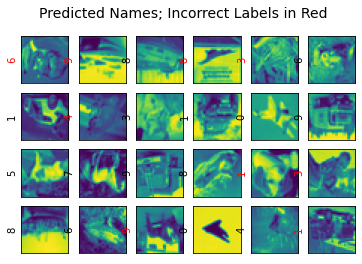

In [106]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test_flat[i].reshape(32, 32).astype('uint8'), origin='lower')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(y_fit[i],
                   color='black' if y_fit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# 3.6: Political figures dataset with sklearn's SVM

In [107]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


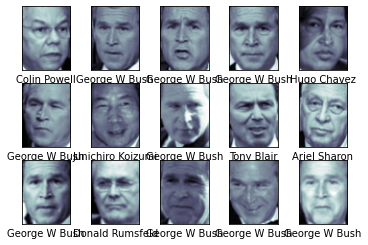

In [108]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

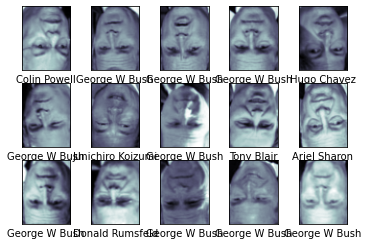

In [109]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    flipped = np.flip(faces.images[i], 0)
    axi.imshow(flipped, cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [110]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [111]:
faces.images.shape, faces.data.shape, faces.target.shape 

((1348, 62, 47), (1348, 2914), (1348,))

In [112]:
62 * 47

2914

In [113]:
faces_flattened = np.zeros((1348, 2914))
for i in range(1348):
    faces_flattened[i] = faces.images[i].flatten()
    
faces_flattened[0]

array([138.        , 135.66667175, 127.66666412, ...,   1.66666663,
         1.66666663,   0.66666669])

In [114]:
faces.data[0]

array([138.       , 135.66667  , 127.666664 , ...,   1.6666666,
         1.6666666,   0.6666667], dtype=float32)

In [115]:
faces_flattened == faces.data

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [116]:
(faces_flattened == faces.data).all()

True

In [117]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [118]:
Xtrain.shape , Xtest.shape , ytrain.shape , ytest.shape 

((1011, 2914), (337, 2914), (1011,), (337,))

In [119]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 59.9 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [120]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

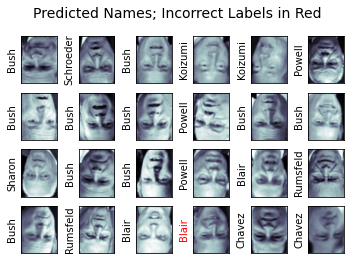

In [121]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    #axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    flipped = np.flip(Xtest[i].reshape(62, 47), 0)
    axi.imshow(flipped, cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [122]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



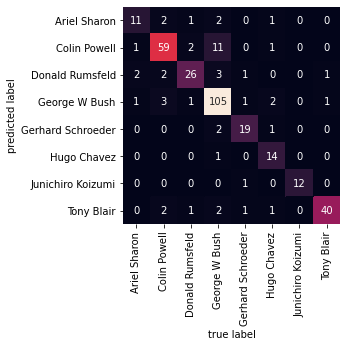

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');